In [80]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Ensemble (앙상블)

*   앙상블은 '일반화'와 '강건성(Robustness)'을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법

*   평균 방법 : 여러 모델의 예측 결과를 독립적으로 구한 귀 평균을 취함. 결합을 통해 획득한 추정 값은 분산이 줄어 들어 안정적인 성능을 보임.

*   부스팅 방법 : 순차적으로 모델을 생성. 결합된 모델의 편향을 감소 시키기 위해 노력, 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

# Bagging (배깅)

*   Bagging은 bootstrap aggregating의 줄임말
*   기존 train set의 일부를 사용해 여러 모델을 훈련
*   각각의 결과를 결합해 최존 결과를 생성
*   분산을 줄이고 과적합을 방지한다. (복잡한 모델에서 성능이 좋음.)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

cancer = load_breast_cancer()   # classification
boston = load_boston()          # regression

In [23]:
# classification

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()      # SVC(), DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_estimator = base_model,
    n_estimators= 10,             # 10 개의 모델 생성
    max_samples = 0.5,            # 한 개의 모델에 최대 50% 데이터 제공
    max_features = 0.5
)

base_model_cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print('base model info')
print('Average fit time : {:.3f} (+/- {:.3f})'.format(base_model_cross_val['fit_time'].mean(), base_model_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(base_model_cross_val['score_time'].mean(), base_model_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(base_model_cross_val['test_score'].mean(), base_model_cross_val['test_score'].std()))
print()


bagging_model_cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print('bagging model info')
print('Average fit time : {:.3f} (+/- {:.3f})'.format(bagging_model_cross_val['fit_time'].mean(), bagging_model_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(bagging_model_cross_val['score_time'].mean(), bagging_model_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(bagging_model_cross_val['test_score'].mean(), bagging_model_cross_val['test_score'].std()))



base model info
Average fit time : 0.002 (+/- 0.000)
Average score time : 0.012 (+/- 0.003)
Average test score : 0.965 (+/- 0.010)

bagging model info
Average fit time : 0.030 (+/- 0.007)
Average score time : 0.018 (+/- 0.003)
Average test score : 0.963 (+/- 0.010)


In [24]:
# regression

from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

base_model = make_pipeline(
    StandardScaler(),
    # SVR()
    KNeighborsRegressor()
    # DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(
    base_estimator = base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

base_model_cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)


print('base model info')
print('Average fit time : {:.3f} (+/- {:.3f})'.format(base_model_cross_val['fit_time'].mean(), base_model_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(base_model_cross_val['score_time'].mean(), base_model_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(base_model_cross_val['test_score'].mean(), base_model_cross_val['test_score'].std()))
print()


bagging_model_cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)

print('bagging model info')
print('Average fit time : {:.3f} (+/- {:.3f})'.format(bagging_model_cross_val['fit_time'].mean(), bagging_model_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(bagging_model_cross_val['score_time'].mean(), bagging_model_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(bagging_model_cross_val['test_score'].mean(), bagging_model_cross_val['test_score'].std()))


base model info
Average fit time : 0.002 (+/- 0.000)
Average score time : 0.002 (+/- 0.000)
Average test score : 0.474 (+/- 0.132)

bagging model info
Average fit time : 0.023 (+/- 0.002)
Average score time : 0.011 (+/- 0.001)
Average test score : 0.485 (+/- 0.111)


# Random Forest

*   Random Forest

*   Extra-Trees

모델 구성에 임의성을 추가해 다양한 모델 집합이 생성

앙상블 모델의 예측 결과는 각 모델의 평균을 반환


In [29]:
# classification

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
    # ExtraTreesClassifier()
)

cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print('Average fit time : {:.3f} (+/- {:.3f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


Average fit time : 0.227 (+/- 0.007)
Average score time : 0.013 (+/- 0.001)
Average test score : 0.961 (+/- 0.020)


In [31]:
# regression

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

model = make_pipeline(
    StandardScaler(),
    # RandomForestRegressor()
    ExtraTreesRegressor()
)

cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)

print('Average fit time : {:.3f} (+/- {:.3f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


Average fit time : 0.222 (+/- 0.061)
Average score time : 0.012 (+/- 0.001)
Average test score : 0.637 (+/- 0.239)


# Visualize

* Decision tree

* Random Forest

* Extras Tree

결정 경계 (classification) 와 회귀식 (regression) 시각화

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap

from sklearn.tree import DecisionTreeClassifier

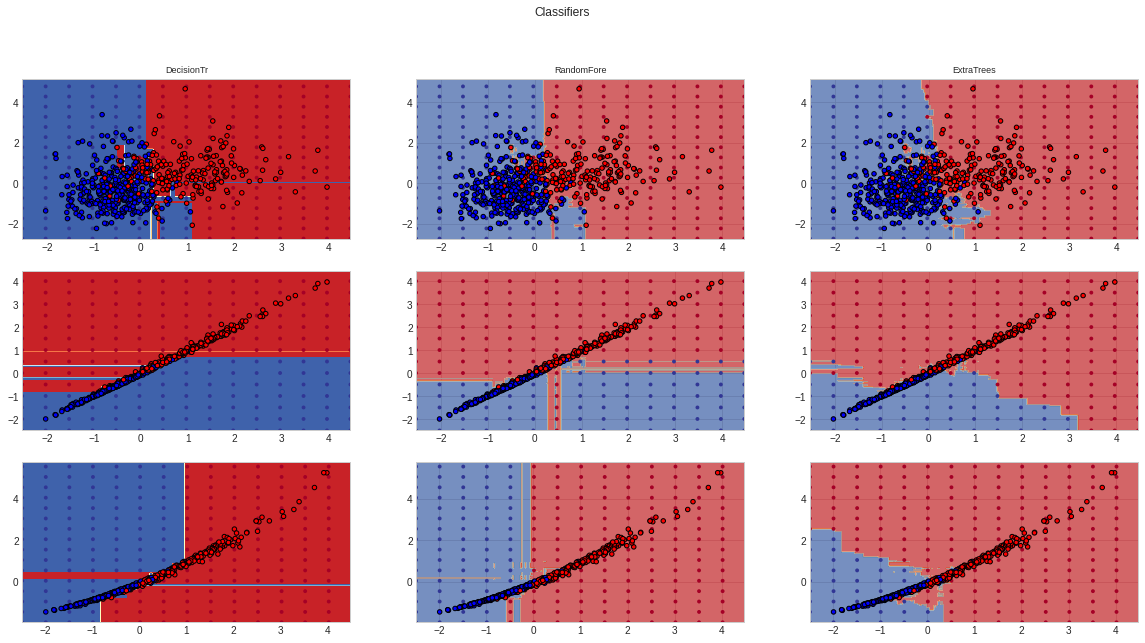

In [40]:
n_classes = 2
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13


plot_idx = 1
models = [DecisionTreeClassifier(max_depth = None),
          RandomForestClassifier(n_estimators = n_estimators),
          ExtraTreesClassifier(n_estimators = n_estimators)]

plt.figure(figsize = (20,10))

for pair in ([0,1], [0,2], [2,3]):

  for model in models:
    X = cancer.data[:, pair]
    y = cancer.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std

    model.fit(X, y)

    model_title = str(type(model)).split(".")[-1][:-2][:len("Classifier")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)

    x_min = X[:, 0].min() - 0.5
    x_max = X[:, 0].max() + 0.5
    y_min = X[:, 1].min() - 0.5
    y_max = X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap = cmap)
    else :
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha = estimator_alpha, cmap = cmap)
    
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    
    cs_point = plt.scatter(xx_coarser, yy_coarser, s = 15,
                           c = Z_points_coarser, cmap = cmap,
                           edgecolor = 'none')
    
    plt.scatter(X[:, 0], X[:, 1], c = y,
                cmap = ListedColormap(['r', 'y', 'b']),
                edgecolor = 'k', s = 20)
    
    plot_idx += 1

plt.suptitle('Classifiers', fontsize = 12)
plt.axis('tight')

plt.show()

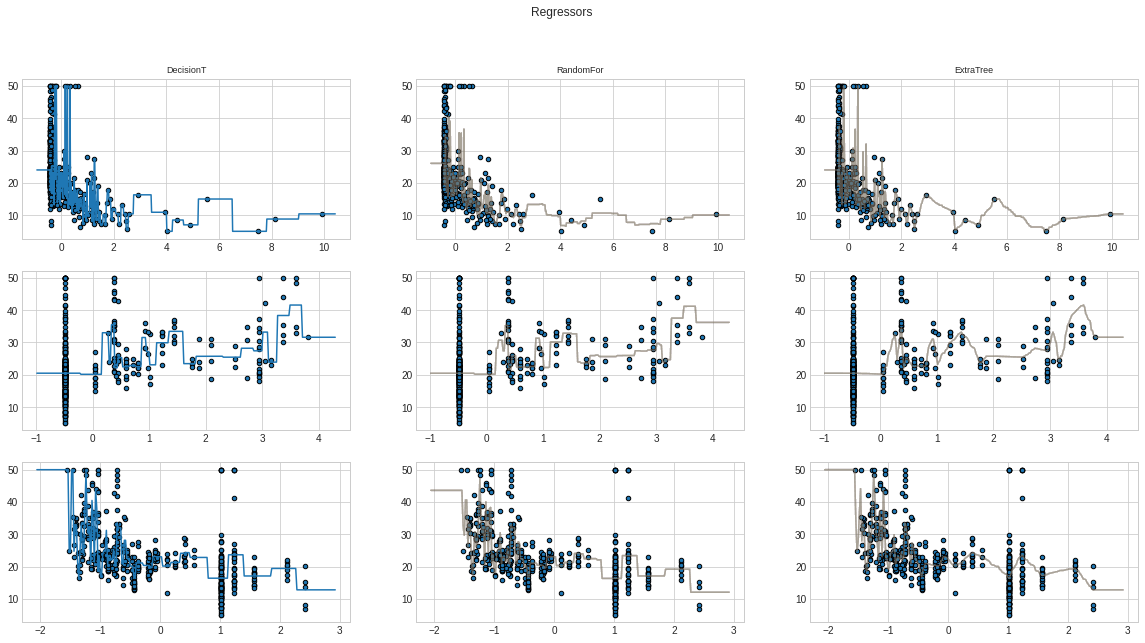

In [46]:
n_classes = 2
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13


plot_idx = 1
models = [DecisionTreeRegressor(max_depth = None),
          RandomForestRegressor(n_estimators = n_estimators),
          ExtraTreesRegressor(n_estimators = n_estimators)]

plt.figure(figsize = (20,10))

for pair in (0, 1, 2):

  for model in models:
    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:len("Regressor")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)

    x_min = X.min() - 0.5
    x_max = X.max() + 0.5
    y_min = X.min() - 0.5
    y_max = X.max() + 0.5

    xx, yy = np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else :
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(xx.reshape(-1,1))
        cs = plt.plot(xx, Z, alpha = estimator_alpha)
    
    plt.scatter(X, y, edgecolor = 'k', s = 20)
    plot_idx += 1

plt.suptitle('Regressors', fontsize = 12)
plt.axis('tight')

plt.show()

# Boosting


# AdaBoost

*   대표적인 부스팅 알고리즘
*   이전 버전의 모델에서 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
*   가중치 투표 or 합을 통해 모델의 예측 값을 결합

*   개별 샘플에 대한 가중치가 수정되면서 연속적으로 반복 학습
   
    ▪ 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
    
    ▪ week learner들은 예측하기 어려운 샘플에 집중
    
# Gradient Tree Boosting

*   임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘

*   웹 검색, 분류, 회귀 모두 사용 가능

In [51]:
# classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


AdaBoost_model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

AdaBoost_cross_val = cross_validate(
    estimator = AdaBoost_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print("AdaBoost")
print('Average fit time : {:.3f} (+/- {:.3f})'.format(AdaBoost_cross_val['fit_time'].mean(), AdaBoost_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(AdaBoost_cross_val['score_time'].mean(), AdaBoost_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(AdaBoost_cross_val['test_score'].mean(), AdaBoost_cross_val['test_score'].std()))
print()

GradBoost_model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

GradBoost_cross_val = cross_validate(
    estimator = GradBoost_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print("Gradient Boosting")
print('Average fit time : {:.3f} (+/- {:.3f})'.format(GradBoost_cross_val['fit_time'].mean(), GradBoost_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(GradBoost_cross_val['score_time'].mean(), GradBoost_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(GradBoost_cross_val['test_score'].mean(), GradBoost_cross_val['test_score'].std()))



AdaBoost
Average fit time : 0.177 (+/- 0.007)
Average score time : 0.010 (+/- 0.001)
Average test score : 0.970 (+/- 0.020)

Gradient Boosting
Average fit time : 0.440 (+/- 0.008)
Average score time : 0.001 (+/- 0.000)
Average test score : 0.960 (+/- 0.025)


In [52]:
# regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


AdaBoost_model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

AdaBoost_cross_val = cross_validate(
    estimator = AdaBoost_model,
    X = boston.data, y = boston.target,
    cv = 5
)

print("AdaBoost")
print('Average fit time : {:.3f} (+/- {:.3f})'.format(AdaBoost_cross_val['fit_time'].mean(), AdaBoost_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(AdaBoost_cross_val['score_time'].mean(), AdaBoost_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(AdaBoost_cross_val['test_score'].mean(), AdaBoost_cross_val['test_score'].std()))
print()

GradBoost_model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

GradBoost_cross_val = cross_validate(
    estimator = GradBoost_model,
    X = boston.data, y = boston.target,
    cv = 5
)

print("Gradient Boosting")
print('Average fit time : {:.3f} (+/- {:.3f})'.format(GradBoost_cross_val['fit_time'].mean(), GradBoost_cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(GradBoost_cross_val['score_time'].mean(), GradBoost_cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(GradBoost_cross_val['test_score'].mean(), GradBoost_cross_val['test_score'].std()))


AdaBoost
Average fit time : 0.110 (+/- 0.006)
Average score time : 0.005 (+/- 0.001)
Average test score : 0.562 (+/- 0.237)

Gradient Boosting
Average fit time : 0.130 (+/- 0.006)
Average score time : 0.001 (+/- 0.000)
Average test score : 0.675 (+/- 0.162)


# Voting Classifier (투표 기반 분류)

*   서로 다른 모델들의 결과를 투표를 통해 결합해 최종 결과를 반환

   ▪  hard voting : 가장 많이 예측된 클래스를 채택
   
   ▪  soft voting : 예측된 확률의 가중치 평균, 예측 비율 반영
   
# Voting Regression (투표 기반 회귀)

*   서로 다른 모델의 예측 값의 평균을 최종 결과로 반환

In [54]:
# classification

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [56]:
# hard voting

model_1 = SVC()
model_2 = GaussianNB()
model_3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [('svc', model_1), 
                  ('Gaus', model_2),
                  ('forest', model_3)],
    voting = 'hard'
)

for model in (model_1, model_2, model_3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, cancer.data, cancer.target, cv = 5)

  print(model_name)
  print("Accuracy : {:.3f} +/- {:.3f}".format(scores.mean(), scores.std()))
  print()

SVC
Accuracy : 0.912 +/- 0.035

GaussianNB
Accuracy : 0.939 +/- 0.015

RandomForestClassifier
Accuracy : 0.963 +/- 0.018

VotingClassifier
Accuracy : 0.951 +/- 0.018



In [58]:
# soft voting

model_1 = SVC(probability= True)
model_2 = GaussianNB()
model_3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [('svc', model_1), 
                  ('Gaus', model_2),
                  ('forest', model_3)],
    voting = 'soft',
    weights = [2, 1, 2]
)

for model in (model_1, model_2, model_3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, cancer.data, cancer.target, cv = 5)

  print(model_name)
  print("Accuracy : {:.3f} +/- {:.3f}".format(scores.mean(), scores.std()))
  print()

SVC
Accuracy : 0.912 +/- 0.035

GaussianNB
Accuracy : 0.939 +/- 0.015

RandomForestClassifier
Accuracy : 0.967 +/- 0.022

VotingClassifier
Accuracy : 0.956 +/- 0.021



In [61]:
# visualize

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

X = cancer.data[:, [0, 2]]
y = cancer.target

model_1 = DecisionTreeClassifier(max_depth = 4)
model_2 = KNeighborsClassifier(n_neighbors = 7)
model_3 = SVC(gamma = 0.1, kernel = 'rbf', probability= True)

vote_model = VotingClassifier(
    estimators = [('decision', model_1),
                  ('knn', model_2),
                  ('SVM', model_3)],
    voting = 'soft',
    weights = [2,1,2]
)

model_1 = model_1.fit(X, y)
model_2 = model_2.fit(X, y)
model_3 = model_3.fit(X, y)
vote_model = vote_model.fit(X, y)

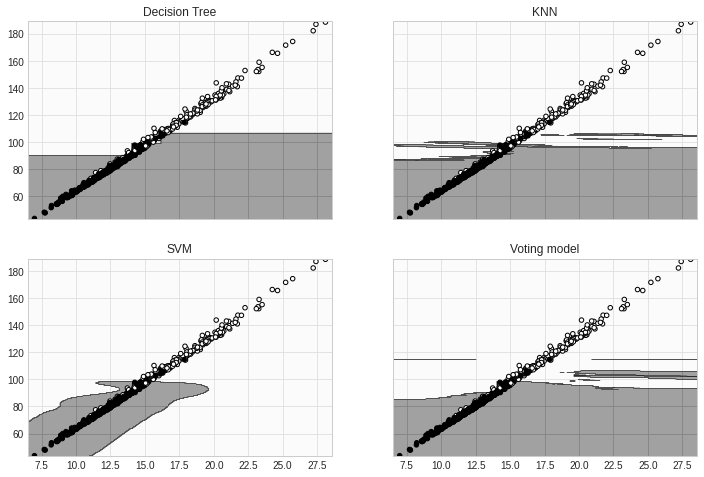

In [62]:
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model_1, model_2, model_3, vote_model],
                          ['Decision Tree', 'KNN', 'SVM', 'Voting model']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  ax[idx[0], idx[1]].contourf(xx, yy, Z, alpha = 0.4)
  ax[idx[0], idx[1]].scatter(X[:, 0], X[:,1], c = y, s = 20, edgecolor = 'k')
  ax[idx[0], idx[1]].set_title(tt)

plt.show()

In [63]:
# regression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [64]:
model_1 = LinearRegression()
model_2 = GradientBoostingRegressor()
model_3 = RandomForestRegressor()

vote_model = VotingRegressor(
    estimators = [('linear', model_1),
                  ('Grad', model_2),
                  ('Forest', model_3)],
    weights = [1,1,1]
)

for model in (model_1, model_2, model_3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv = 5)

  print(model_name)
  print("R2 (r-squared) : {:.3f} +/- {:.3f}".format(scores.mean(), scores.std()))
  print()

LinearRegression
R2 (r-squared) : 0.353 +/- 0.377

GradientBoostingRegressor
R2 (r-squared) : 0.680 +/- 0.152

RandomForestRegressor
R2 (r-squared) : 0.625 +/- 0.218

VotingRegressor
R2 (r-squared) : 0.669 +/- 0.192



In [65]:
# visualize

X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

model_1 = LinearRegression()
model_2 = GradientBoostingRegressor()
model_3 = RandomForestRegressor()

vote_model = VotingRegressor(
    estimators = [('linear', model_1),
                  ('Grad', model_2),
                  ('Forest', model_3)],
    weights = [1,1,1]
)

model_1 = model_1.fit(X, y)
model_2 = model_2.fit(X, y)
model_3 = model_3.fit(X, y)
vote_model = vote_model.fit(X, y)

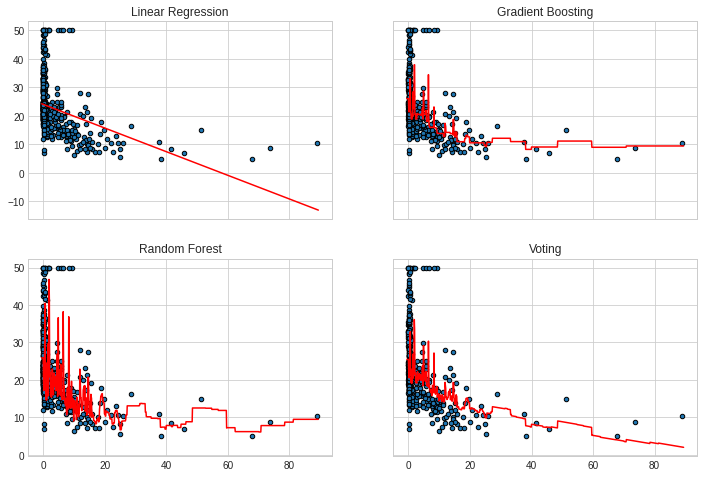

In [67]:
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5

xx = np.arange(x_min, x_max, 0.1)

f, ax = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model_1, model_2, model_3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  ax[idx[0], idx[1]].plot(xx, Z, c ='r')
  ax[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor = 'k')
  ax[idx[0], idx[1]].set_title(tt)

plt.show()

# Stacking

Stacked Generation (스택 일반화)

*   각 모델의 예측 값을 최종 모델의 입력으로 사용

*   모델의 편향 (bias)를 줄임

In [68]:
# regression

from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [69]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

cross_val = cross_validate(
    estimator = reg,
    X = boston.data, y = boston.target,
    cv = 5
)

print('Average fit time : {:.3f} (+/- {:.3f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


Average fit time : 0.275 (+/- 0.032)
Average score time : 0.008 (+/- 0.000)
Average test score : 0.324 (+/- 0.335)


In [70]:
# visualize

X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

model_1 = Ridge()
model_2 = Lasso()
model_3 = SVR()

estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )

model_1 = model_1.fit(X, y)
model_2 = model_2.fit(X, y)
model_3 = model_3.fit(X, y)
reg = reg.fit(X, y)

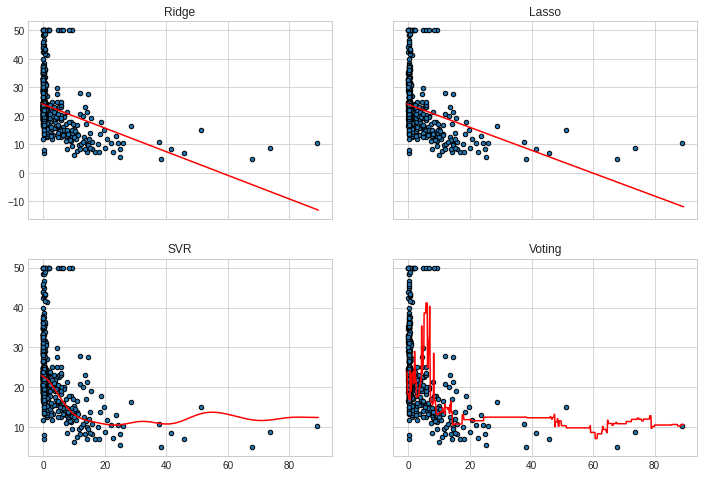

In [71]:
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5

xx = np.arange(x_min, x_max, 0.1)

f, ax = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model_1, model_2, model_3, reg],
                          ['Ridge', 'Lasso', 'SVR', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  ax[idx[0], idx[1]].plot(xx, Z, c ='r')
  ax[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor = 'k')
  ax[idx[0], idx[1]].set_title(tt)

plt.show()

In [76]:
# classification

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [78]:
estimators = [('logistic', LogisticRegression(max_iter = 10000)),
              ('SVC', SVC()),
              ('Gaus', GaussianNB())]

clf = StackingClassifier(                         # clf = classifier
        estimators = estimators,
        final_estimator = RandomForestClassifier()
    )


cross_val = cross_validate(
    estimator = clf,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print('Average fit time : {:.3f} (+/- {:.3f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {:.3f} (+/- {:.3f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {:.3f} (+/- {:.3f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


Average fit time : 6.180 (+/- 2.540)
Average score time : 0.016 (+/- 0.001)
Average test score : 0.954 (+/- 0.023)


In [79]:
# 결정 경계 시각화
# 귀찮음....

# XGBoost (eXpress Gradient Boost)

*   트리 기반의 앙상블 부스팅 기법

*   classification에 특화되어 높은 예측 성능을 보여줌.

*   GBM 기반이지만, 느린 수행 시간과 과적합 문제를 개선함.

regression은 가능은 하지만 성능 보장이 어려움.


In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import graphviz

In [111]:
# Classification

# XGBoost는 C로 작성이 되어있어 속도가 빠름

import xgboost as xgb                               # sci-kit learn 없이 파이썬으로 xgb 사용가능
from xgboost import XGBClassifier                   # sci-kit learn에 적합하게 wrapping된 구성
from xgboost import plot_importance, plot_tree


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)

# sci-kit learn 없이 파이썬 에서 사용하는 xbg는 고유의 DMatrix라는 고유의 구조를 클래스로 가지고 있다.
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)


In [112]:
params = {
    'max_depth':3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'ealty_stopping' : 100,
}

num_rounds = 400

In [113]:
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, 
                      early_stopping_rounds = 100, evals = evals)

[0]	train-logloss:0.607881	test-logloss:0.615023
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.538068	test-logloss:0.552662
[2]	train-logloss:0.482054	test-logloss:0.505813
[3]	train-logloss:0.430923	test-logloss:0.46055
[4]	train-logloss:0.389772	test-logloss:0.426678
[5]	train-logloss:0.352717	test-logloss:0.39185
[6]	train-logloss:0.319037	test-logloss:0.361635
[7]	train-logloss:0.291777	test-logloss:0.339953
[8]	train-logloss:0.265027	test-logloss:0.316067
[9]	train-logloss:0.24318	test-logloss:0.295098
[10]	train-logloss:0.222755	test-logloss:0.279955
[11]	train-logloss:0.206073	test-logloss:0.265579
[12]	train-logloss:0.190671	test-logloss:0.25234
[13]	train-logloss:0.175593	test-logloss:0.238356
[14]	train-logloss:0.162524	test-logloss:0.227972
[15]	train-logloss:0.150096	test-logloss:0.215917
[16]	train-logloss:0.139209	test-logloss:0.206422
[17]	train-log

In [114]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

preds = [ 1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])

print()
print('Accuracy : {:.3f}'.format(accuracy_score(y_test, preds)))
print('precision : {:.3f}'.format(precision_score(y_test, preds)))
print('recall : {:.3f}'.format(recall_score(y_test, preds)))



[0.    0.    0.004 1.    0.001 0.992 0.966 0.252 1.    0.   ]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0]

Accuracy : 0.974
precision : 0.986
recall : 0.972


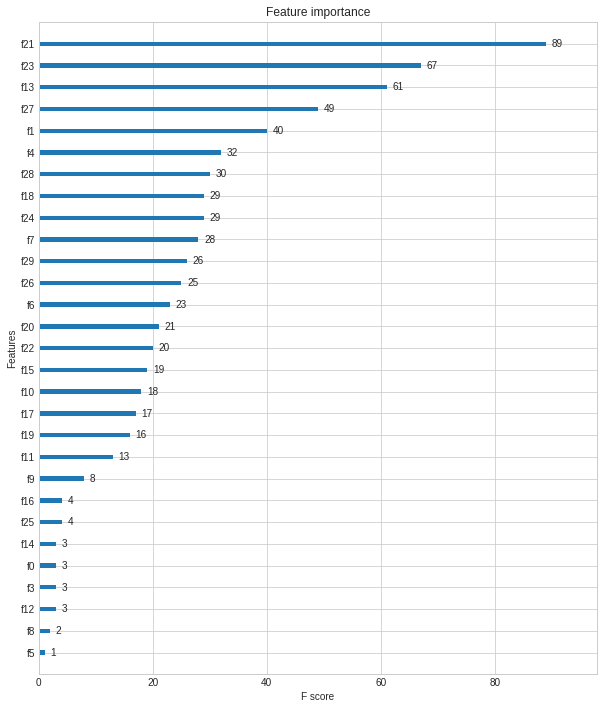

In [115]:
# 어떤 feature가 영향이 높은지 확인
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax = ax)

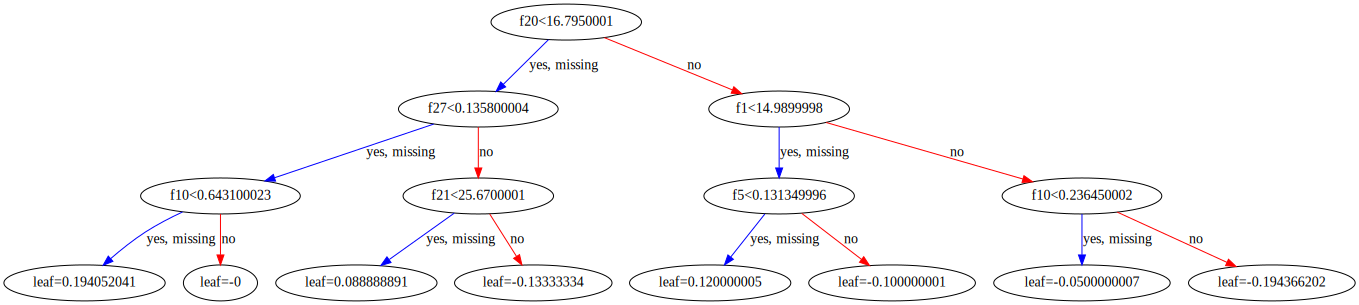

In [116]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

In [121]:
# sci- kit learn에 wrapping 된 XGBoost

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)


In [122]:
xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(X_train, y_train)

preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [123]:
cross_val = cross_validate(
    estimator = xgbc,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print('Average fit time : {:.3f} +/- {:.3f}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {:.3f} +/- {:.3f}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {:.3f} +/- {:.3f}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.231 +/- 0.015
Average score time : 0.002 +/- 0.000
Average test score : 0.974 +/- 0.010


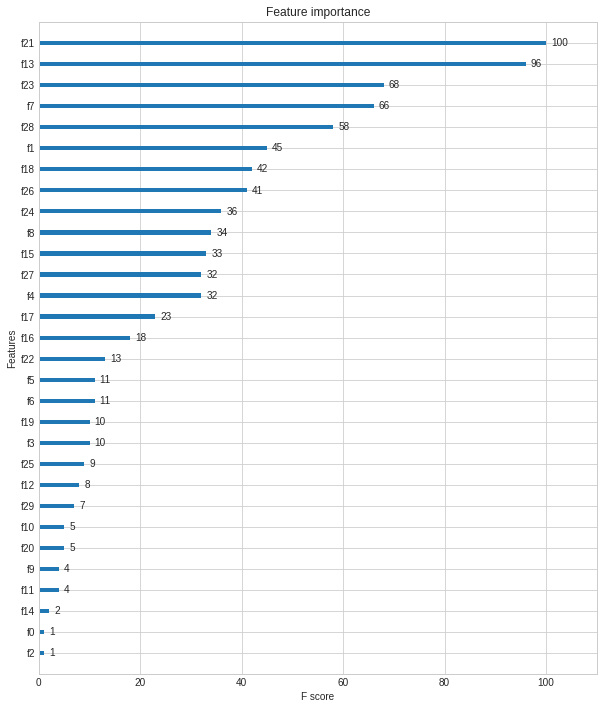

In [124]:
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgbc, ax = ax)

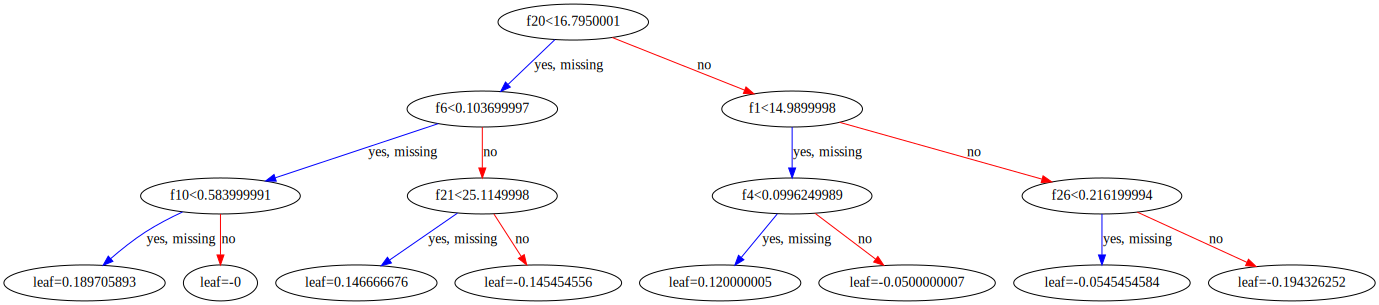

In [125]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# regression

import xgboost as xgb
from xgboost import XGBRegressor

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2)

# LightGBM (Light Gradient Boost Machine)

*   적은 메모리 소모와 빠른 속도가 장점임.

*   범주형 변수들의 자동 변환과 분할에 최적화 (최적 분할) 되어있음.

*   모델 자체의 성능에는 부족함이 있음. (데이터가 많은 경우 효과가 좋다고 볼 수 있음)

역시 Classification에 특화되어 있으며, Regression에는 성능이 좋지 않음.



In [127]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree    # 라이브러리 명 유의

In [128]:
# classifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)

In [129]:
lgbmc = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]

lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = lgbmc.predict(X_test)

[1]	valid_0's binary_logloss: 0.608213	valid_0's binary_logloss: 0.608213
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.538424	valid_0's binary_logloss: 0.538424
[3]	valid_0's binary_logloss: 0.48333	valid_0's binary_logloss: 0.48333
[4]	valid_0's binary_logloss: 0.436657	valid_0's binary_logloss: 0.436657
[5]	valid_0's binary_logloss: 0.398183	valid_0's binary_logloss: 0.398183
[6]	valid_0's binary_logloss: 0.362848	valid_0's binary_logloss: 0.362848
[7]	valid_0's binary_logloss: 0.334617	valid_0's binary_logloss: 0.334617
[8]	valid_0's binary_logloss: 0.310239	valid_0's binary_logloss: 0.310239
[9]	valid_0's binary_logloss: 0.28766	valid_0's binary_logloss: 0.28766
[10]	valid_0's binary_logloss: 0.267729	valid_0's binary_logloss: 0.267729
[11]	valid_0's binary_logloss: 0.250704	valid_0's binary_logloss: 0.250704
[12]	valid_0's binary_logloss: 0.236906	valid_0's binary_logloss: 0.236906
[13]	valid_0's binary_logloss: 0.224225	valid_0's 

In [130]:
cross_val = cross_validate(
    estimator = lgbmc,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print('Average fit time : {:.3f} +/- {:.3f}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {:.3f} +/- {:.3f}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {:.3f} +/- {:.3f}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.425 +/- 0.011
Average score time : 0.004 +/- 0.000
Average test score : 0.970 +/- 0.018


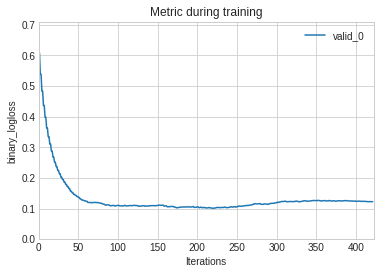

In [131]:
plot_metric(lgbmc)

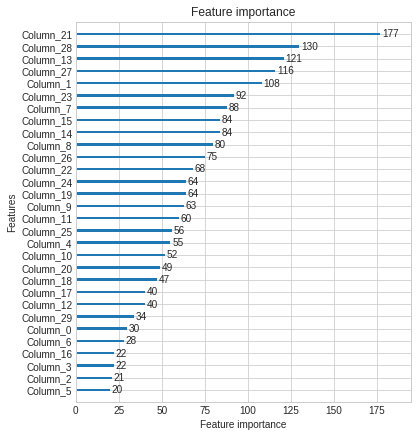

In [134]:
plot_importance(lgbmc, figsize = (6,7))

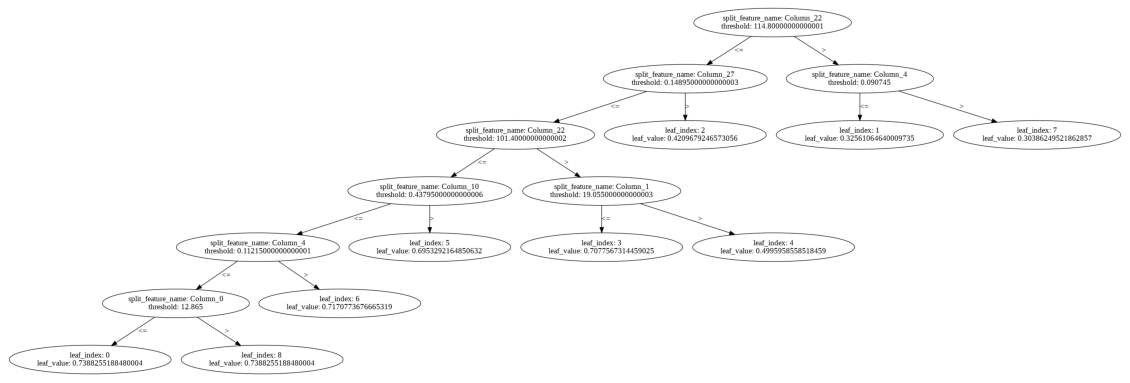

In [138]:
plot_tree(lgbmc, figsize = (20,15))

In [139]:
# regression
# 귀찮음...